In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
# load dataset
train_df = pd.read_csv('/content/Titanic_train.csv')
test_df = pd.read_csv('/content/Titanic_test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Check feature types and null values
train_df.info() # Age,Cabin,Embarked has Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Summary statistics
print("\nSummary statistics:")
print(train_df.describe(include='all'))


Summary statistics:
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   71

In [ ]:
# Check class distribution
print("\nSurvival distribution:")
print(train_df['Survived'].value_counts())


Survival distribution:
Survived
0    549
1    342
Name: count, dtype: int64


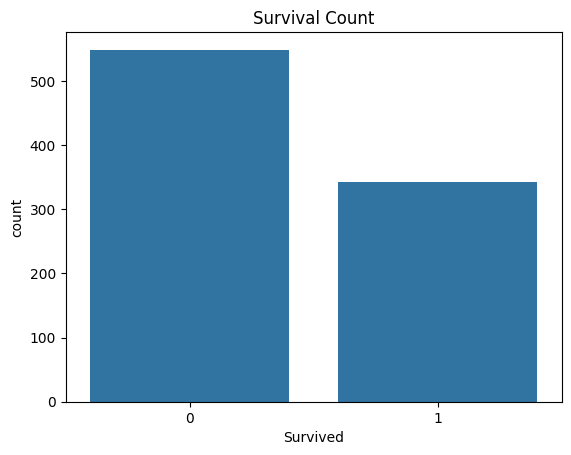

In [ ]:
# Visualizations
# 1. Survival count
sns.countplot(data=train_df, x='Survived')
plt.title("Survival Count")
plt.show()

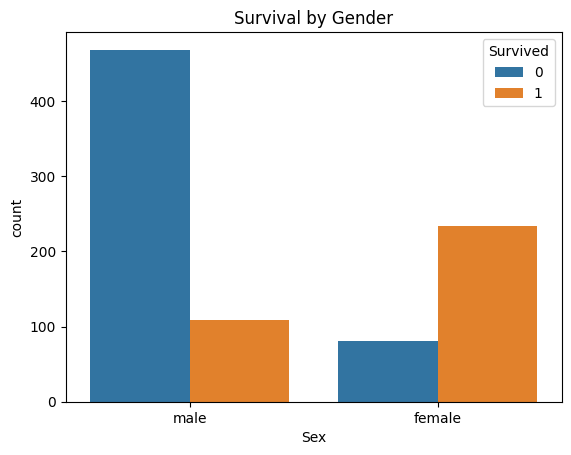

In [ ]:
# 2. Sex vs Survival
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title("Survival by Gender")
plt.show()

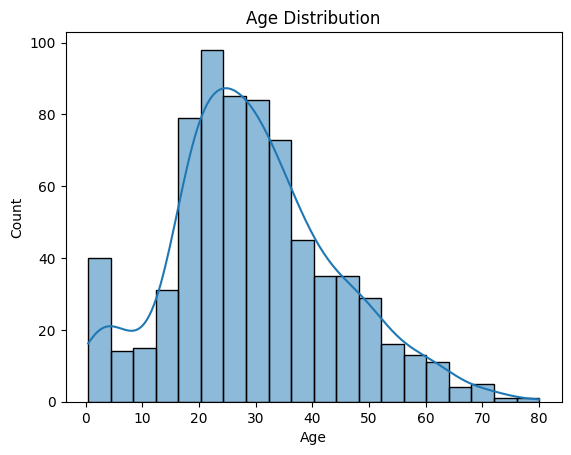

In [ ]:
# 3. Age distribution
sns.histplot(train_df['Age'].dropna(), kde=True)
plt.title("Age Distribution")
plt.show()

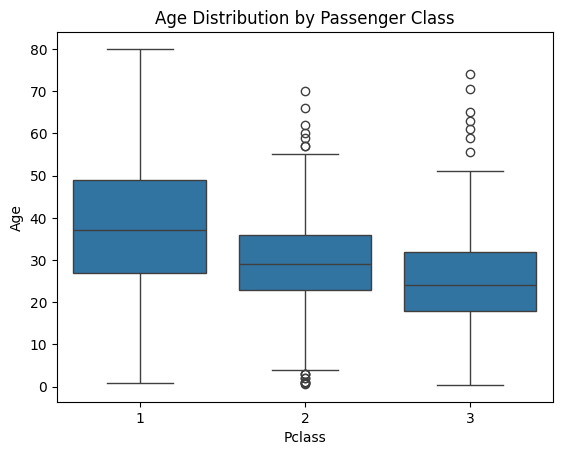

In [ ]:
# 4. Boxplot for Age vs Pclass
sns.boxplot(data=train_df, x='Pclass', y='Age')
plt.title("Age Distribution by Passenger Class")
plt.show()

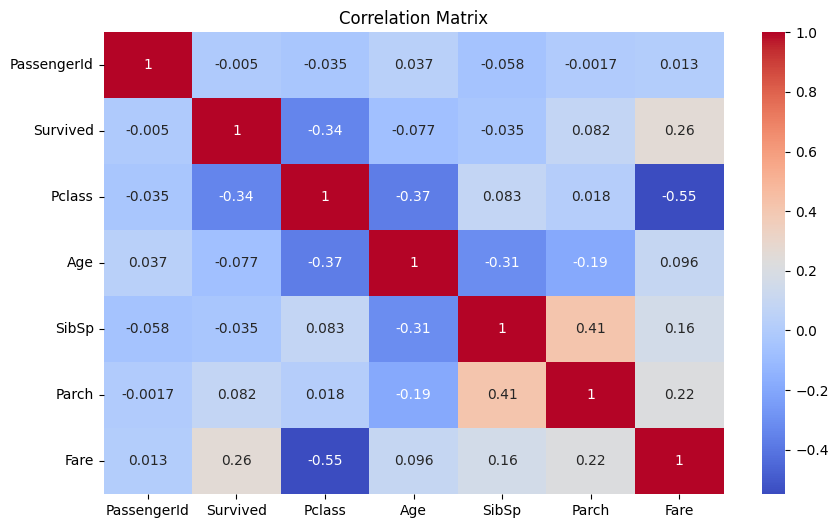

In [ ]:
# 5. Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

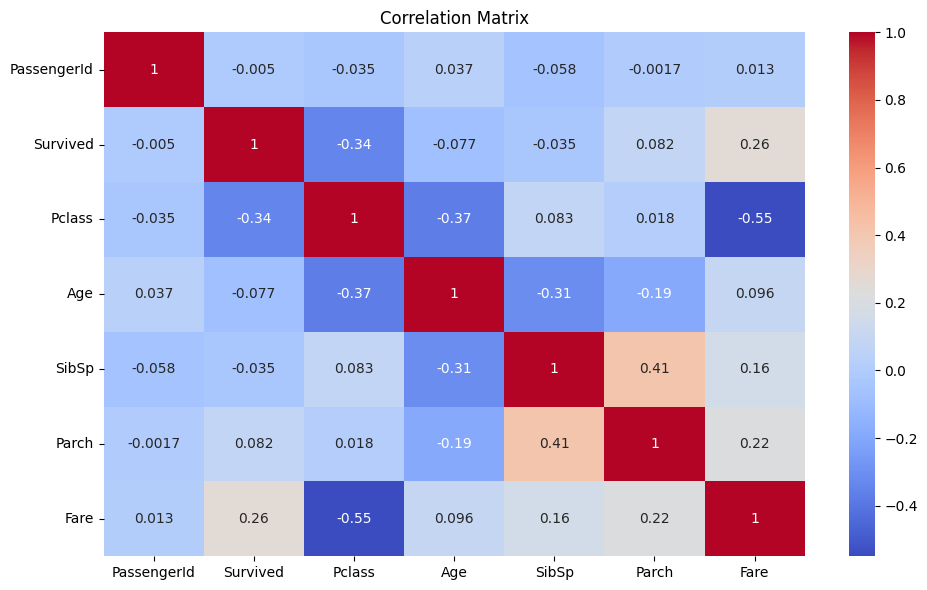

In [ ]:
# Heatmap of correlations (numerical only)
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [ ]:
# drop columns wich are not usefull for model
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
train_df.drop(columns=drop_cols, inplace=True)
test_df.drop(columns=drop_cols, inplace=True)

In [ ]:
# Fill missing Age values with median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

In [ ]:
# Fill missing Embarked with mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [ ]:
# Fill missing Fare in test data with median
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

In [ ]:
# One-hot encode 'Sex' and 'Embarked'
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)

# Make sure both train and test have same columns
missing_cols = set(train_df.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0
test_df = test_df[train_df.drop('Survived', axis=1).columns]  # reordering


In [ ]:
# Define features (X) and target (y)
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']

X_test = test_df.copy()  # to use in predictions later

In [ ]:
# Build and train logistic regression model
log_model = LogisticRegression(max_iter=1000)  # Make sure log_model is defined here
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predict on training set (to evaluate)
y_train_pred = log_model.predict(X_train)
y_train_prob = log_model.predict_proba(X_train)[:, 1]
y_train_pred
y_train_prob

array([0.09143025, 0.91447222, 0.61890374, 0.88695165, 0.07743422,
       0.13554946, 0.27408328, 0.0989295 , 0.5729967 , 0.8938252 ,
       0.72148007, 0.80788033, 0.12968456, 0.03580195, 0.71989217,
       0.61312132, 0.104361  , 0.2438964 , 0.50031312, 0.68816402,
       0.20246373, 0.20407351, 0.77941639, 0.49631063, 0.54481558,
       0.34608983, 0.13860052, 0.43118309, 0.68232845, 0.09883747,
       0.47347916, 0.94863617, 0.68226743, 0.06972232, 0.53926116,
       0.30390071, 0.13860161, 0.12542655, 0.54597729, 0.7353123 ,
       0.41054572, 0.77355643, 0.13877511, 0.91810562, 0.75192038,
       0.0988674 , 0.10417382, 0.68226743, 0.08135999, 0.62205159,
       0.06451187, 0.12536681, 0.87658204, 0.7618532 , 0.25579544,
       0.49631063, 0.85188813, 0.13633309, 0.87275179, 0.03895539,
       0.16835067, 0.91036187, 0.29421345, 0.08701784, 0.58734496,
       0.09943443, 0.80897522, 0.13409236, 0.35724698, 0.0594936 ,
       0.21586243, 0.31466104, 0.32480938, 0.11415837, 0.09471

In [ ]:
evaluation_metrics = {
    "Accuracy": accuracy_score(y_train, y_train_pred),
    "Precision": precision_score(y_train, y_train_pred),
    "Recall": recall_score(y_train, y_train_pred),
    "F1 Score": f1_score(y_train, y_train_pred),
    "ROC AUC": roc_auc_score(y_train, y_train_prob)
}
evaluation_metrics

{'Accuracy': 0.7991021324354658,
 'Precision': 0.7570977917981072,
 'Recall': 0.7017543859649122,
 'F1 Score': 0.7283763277693475,
 'ROC AUC': np.float64(0.8569088933627329)}

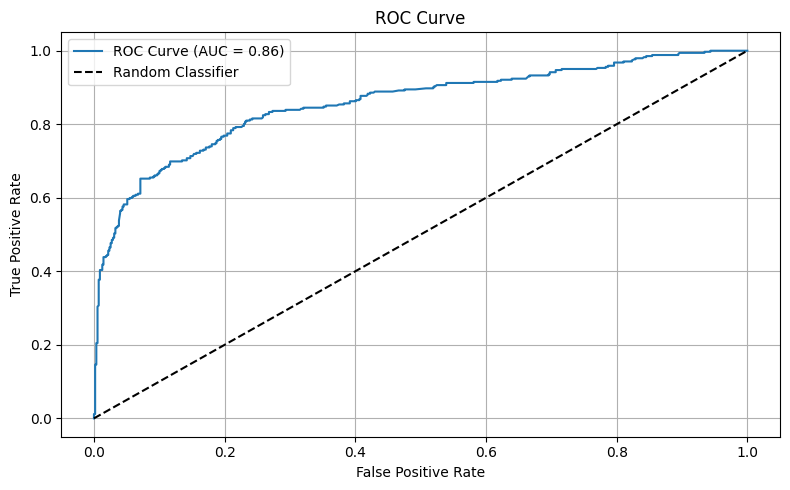

In [ ]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_train, y_train_prob)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {evaluation_metrics['ROC AUC']:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Show model coefficients with feature names
coefficients = pd.Series(log_model.coef_[0], index=X_train.columns)
coefficients.sort_values(ascending=False)

,0
Fare,0.002179
Embarked_Q,-0.028482
Age,-0.038265
Parch,-0.079767
SibSp,-0.314271
Embarked_S,-0.384708
Pclass,-1.067653
Sex_male,-2.618512


In [ ]:
# Fare	      +0.002179	: Slight increase in survival with higher fare (often richer passengers)
# Embarked_Q	-0.028482	: Minor negative effect from Queenstown embarkation
# Age	        -0.038265	: Older passengers had a slightly lower chance of survival
# Parch	      -0.079767	: More parents/children aboard slightly reduced survival chances
# SibSp	      -0.314271	: More siblings/spouses aboard reduces survival (possibly harder to escape)
# Embarked_S	-0.384708	: Embarking from Southampton slightly reduced survival probability
# Pclass	    -1.067653	: Lower class passengers (e.g., 3rd class) were much less likely to survive
# Sex_male	  -2.618512	: Being male significantly decreased survival chance (females were prioritized)

In [ ]:
# Interpretation Summary:

# Who survived?

 # Younger passengers

 # Females

 # First-class ticket holders

 # Those who paid higher fares

# Who didn’t?

 # Males

 # Third-class passengers

 # Older individuals with large families onboard

# Deployment with Streamlit:

In [ ]:
import pickle
with open('titanic_log_model.pkl', 'wb') as f:
    pickle.dump(log_model, f)

# Interview Questions:

In [1]:
# 1. What is the difference between precision and recall?

#------------

# Precision : Precision is the proportion of correctly predicted positive cases out of all cases the model predicted as positive.

#------------

# Recall : Recall is the proportion of correctly predicted positive cases out of all actual positive cases.

In [ ]:
# 2. What is Cross-Validation?

# Cross-validation is a technique used to evaluate how well a machine learning model will perform on unseen data.
# It works by splitting the dataset into multiple parts (called folds), training the model on some parts, and testing it on the rest — multiple times.

# Why it is important ?
# 	Gives a better estimate of model performance on unseen data
#   Especially useful when dataset is small — every sample is used for both training and validation